# Abstract

This is Brendan's EDA notebook

## Imports

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
%matplotlib inline

In [2]:
tree_df = pd.read_csv("../data/tree.csv")
tree_df.head()

,address,bbl,bin,block_id,boro_ct,borocode,boroname,brch_light,brch_other,brch_shoe,...,tree_dbh,tree_id,trnk_light,trnk_other,trunk_wire,user_type,x_sp,y_sp,zip_city,zipcode
0,108-005 70 AVENUE,4.022210e+09,4052307.0,348711,4073900,4,Queens,No,No,No,...,3,180683,No,No,No,TreesCount Staff,1027431.148,202756.7687,Forest Hills,11375
1,147-074 7 AVENUE,4.044750e+09,4101931.0,315986,4097300,4,Queens,No,No,No,...,21,200540,No,No,No,TreesCount Staff,1034455.701,228644.8374,Whitestone,11357
2,390 MORGAN AVENUE,3.028870e+09,3338310.0,218365,3044900,3,Brooklyn,No,No,No,...,3,204026,No,No,No,Volunteer,1001822.831,200716.8913,Brooklyn,11211
3,1027 GRAND STREET,3.029250e+09,3338342.0,217969,3044900,3,Brooklyn,No,No,No,...,10,204337,No,No,No,Volunteer,1002420.358,199244.2531,Brooklyn,11211
4,603 6 STREET,3.010850e+09,3025654.0,223043,3016500,3,Brooklyn,No,No,No,...,21,189565,No,No,No,Volunteer,990913.775,182202.4260,Brooklyn,11215


In [4]:
dog_bite_df = pd.read_csv("../data/dog_bite.csv")
dog_bite_df.head()

,age,borough,breed,dateofbite,gender,spayneuter,species,uniqueid,zipcode
0,3,Brooklyn,"Poodle, Standard",2015-01-02T00:00:00.000,M,True,DOG,1,11238
1,NaN,Brooklyn,HUSKY,2015-01-02T00:00:00.000,U,False,DOG,2,11249
2,NaN,Brooklyn,NaN,2015-01-02T00:00:00.000,U,False,DOG,3,NaN
3,6,Brooklyn,American Pit Bull Terrier/Pit Bull,2015-01-01T00:00:00.000,M,False,DOG,4,11221
4,1,Brooklyn,American Pit Bull Terrier/Pit Bull,2015-01-03T00:00:00.000,M,False,DOG,5,11207


In [10]:
dog_license_df = pd.read_csv("../data/dog_license.csv")
dog_license_df.head()

,animalbirth,animalgender,animalname,borough,breedname,censustract2010,citycouncildistrict,communitydistrict,congressionaldistrict,licenseexpireddate,licenseissueddate,nta,rownumber,statesenatorialdistrict,zipcode
0,2013-05-01T00:00:00.000,F,BONITA,Queens,Unknown,208.0,28.0,412.0,5.0,2017-11-15T00:00:00.000,2014-10-24T00:00:00.000,QN61,533,10.0,11435.0
1,2014-05-01T00:00:00.000,M,ROCKY,Queens,Labrador Retriever Crossbreed,100801.0,31.0,414.0,5.0,2019-10-25T00:00:00.000,2014-10-25T00:00:00.000,QN15,548,10.0,11691.0
2,2010-07-01T00:00:00.000,M,BULLY,Queens,American Pit Bull Terrier/Pit Bull,98.0,28.0,410.0,5.0,2016-09-24T00:00:00.000,2014-10-28T00:00:00.000,QN55,622,10.0,11419.0
3,2005-02-01T00:00:00.000,M,COCO,Queens,Labrador Retriever,964.0,31.0,414.0,5.0,2017-10-29T00:00:00.000,2014-10-29T00:00:00.000,QN12,633,10.0,11692.0
4,2012-09-01T00:00:00.000,F,SKI,Queens,American Pit Bull Terrier/Pit Bull,100802.0,31.0,414.0,5.0,2019-10-31T00:00:00.000,2014-10-31T00:00:00.000,QN15,655,10.0,11691.0


## Combining Data

Here I will group dogs by zip code to figure out a population for each zip code, and then use this value to figure out how many dog licenses are near each tree in our dataframe

### Extract ZIP info

In [17]:
zip_df = dog_license_df.groupby("zipcode").describe()

In [28]:
zip_df = zip_df["statesenatorialdistrict"][["count"]]

In [29]:
zip_df.head()

,count
zipcode,
121.0,0.0
1003.0,0.0
1175.0,0.0
7013.0,0.0
7030.0,0.0


### Cross referencing

In [30]:
lic_dict = {key : value for key,value in zip(zip_df.index,zip_df["count"])}
tree_df["dogs_near_tree"] = tree_df.zipcode.map(lic_dict)

In [88]:
tree_df.to_csv("../data/tree.csv",index=False)

In [89]:
tree_df.head()

,address,bbl,bin,block_id,boro_ct,borocode,boroname,brch_light,brch_other,brch_shoe,...,trnk_other,trunk_wire,user_type,x_sp,y_sp,zip_city,zipcode,dogs_near_tree,dogs_in_zip_clusters,truncated_zip
0,108-005 70 AVENUE,4.022210e+09,4052307.0,348711,4073900,4,Queens,No,No,No,...,No,No,TreesCount Staff,1027431.148,202756.7687,Forest Hills,11375,1114.0,13781.0,113
1,147-074 7 AVENUE,4.044750e+09,4101931.0,315986,4097300,4,Queens,No,No,No,...,No,No,TreesCount Staff,1034455.701,228644.8374,Whitestone,11357,724.0,13781.0,113
2,390 MORGAN AVENUE,3.028870e+09,3338310.0,218365,3044900,3,Brooklyn,No,No,No,...,No,No,Volunteer,1001822.831,200716.8913,Brooklyn,11211,1094.0,29571.0,112
3,1027 GRAND STREET,3.029250e+09,3338342.0,217969,3044900,3,Brooklyn,No,No,No,...,No,No,Volunteer,1002420.358,199244.2531,Brooklyn,11211,1094.0,29571.0,112
4,603 6 STREET,3.010850e+09,3025654.0,223043,3016500,3,Brooklyn,No,No,No,...,No,No,Volunteer,990913.775,182202.4260,Brooklyn,11215,2036.0,29571.0,112


### Check for missing values, keep in mind for later

In [90]:
tree_df.dogs_near_tree.isna().sum()

1297

In [91]:
tree_df.health.isna().sum()

31616

### Feature Selection

Since we are interested in impact of dogs on trees, features selection was determined by qualities that would change how a dog would interact with a tree, such as if there are tree railings obstructing it, and how big the trees are, and where on the curb they are located.

In [92]:
features = ['zipcode', 'dogs_near_tree', 'stump_diam', 'tree_dbh', 'guards', 'curb_loc', 'health']

In [95]:
condensed_df = tree_df[features]

In [96]:
condensed_df.head()

,zipcode,dogs_near_tree,stump_diam,tree_dbh,guards,curb_loc,health
0,11375,1114.0,0,3,None,OnCurb,Fair
1,11357,724.0,0,21,None,OnCurb,Fair
2,11211,1094.0,0,3,None,OnCurb,Good
3,11211,1094.0,0,10,None,OnCurb,Good
4,11215,2036.0,0,21,None,OnCurb,Good


In [104]:
condensed_df.health.fillna("Dead",inplace=True)

/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [260]:
condensed_df.health.value_counts()

Good    527716
Fair     96398
Dead     31594
Poor     26783
Name: health, dtype: int64

Factorize the health values

In [106]:
lookup = {"Dead" : 0,
          "Poor" : 1,
          "Fair" : 2,
          "Good" : 3}

In [107]:
health_series = condensed_df.health.map(lookup)

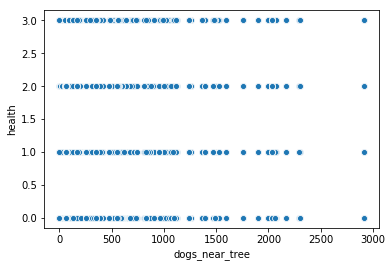

In [108]:
sns.scatterplot(condensed_df.dogs_near_tree,health_series)

In [109]:
condensed_df["factorized_health"] = health_series

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
condensed_df.head()

,zipcode,dogs_near_tree,stump_diam,tree_dbh,guards,curb_loc,health,factorized_health
0,11375,1114.0,0,3,None,OnCurb,Fair,2
1,11357,724.0,0,21,None,OnCurb,Fair,2
2,11211,1094.0,0,3,None,OnCurb,Good,3
3,11211,1094.0,0,10,None,OnCurb,Good,3
4,11215,2036.0,0,21,None,OnCurb,Good,3


In [113]:
grouped_df = condensed_df.groupby("zipcode").mean()

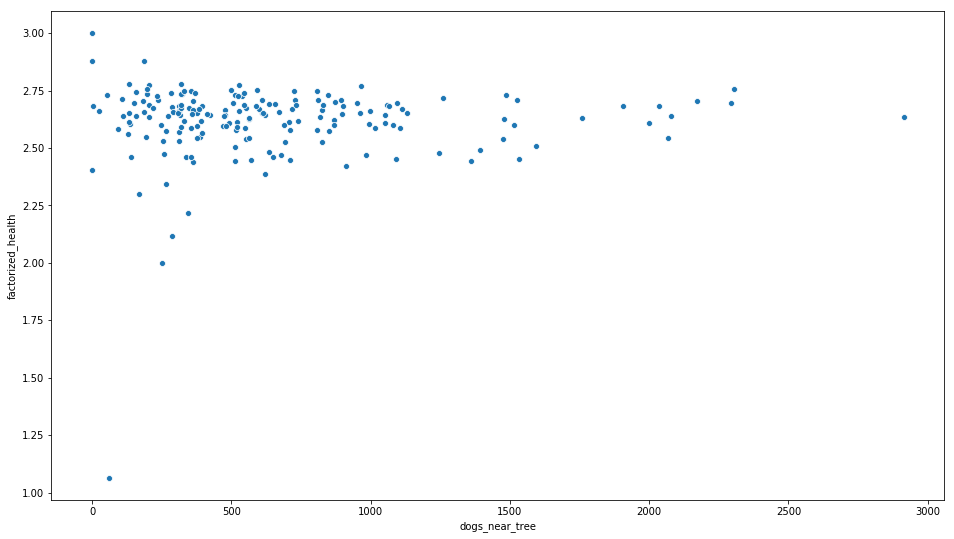

In [116]:
plt.figure(figsize=(16,9))
sns.scatterplot(grouped_df["dogs_near_tree"], grouped_df.factorized_health)


This scatterplot would actually suggest there just is almost no relation between number of dog licenses in a zip code and the "average" health of trees within that zipcode!

## Other Avenues

Two of these columns are essentially one column split into two, as one has measurements for stumped trees and the other has measurements for alive trees.

In [169]:
condensed_df["combined_diam"] = [stump if stump != 0 else dbh for stump,dbh in zip(condensed_df["stump_diam"],condensed_df["tree_dbh"])]

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [172]:
condensed_df.drop(columns=["stump_diam","tree_dbh"],inplace=True)

/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [173]:
condensed_df.head()

,zipcode,dogs_near_tree,guards,curb_loc,health,factorized_health,combined_diam
0,11375,1114.0,None,OnCurb,Fair,2,3
1,11357,724.0,None,OnCurb,Fair,2,21
2,11211,1094.0,None,OnCurb,Good,3,3
3,11211,1094.0,None,OnCurb,Good,3,10
4,11215,2036.0,None,OnCurb,Good,3,21


Define our features

In [177]:
features = [col for col in condensed_df.columns if col != "zipcode" and col != "factorized_health"]

In [178]:
features

['dogs_near_tree', 'guards', 'curb_loc', 'health', 'combined_diam']

In [204]:
condensed_df.dropna(subset=["dogs_near_tree"],inplace=True)

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Train test split

In [205]:
X = condensed_df[features]
y = condensed_df["factorized_health"]

In [213]:
logclf = LogisticRegression()

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

### Preproccessing

Separate numerical columns, scale them, then recombine, then dummy.

In [246]:
X_num = X_train[["dogs_near_tree","combined_diam"]]
text_features = [col for col in features if col != "dogs_near_tree" and col != "combined_diam"]
X_textual = X_train[text_features]

In [247]:
ss = StandardScaler()
ss.fit(X_num)
X_num_sc = ss.transform(X_num)
X_num_sc_df = pd.DataFrame(X_num_sc, columns=["dogs_near_tree","combined_diam"])
X_new = X_num_sc_df.join(X_textual)
X_train_sc = pd.get_dummies(X_new,drop_first=True)

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Model testing

Fit model

In [250]:
logclf.fit(X_train_sc,y_train)

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Preprocess testing data

In [251]:
X_num_test = X_test[["dogs_near_tree","combined_diam"]]
X_textual_test = X_test[text_features]
X_num_sc = ss.transform(X_num_test)
X_num_sc_df = pd.DataFrame(X_num_sc, columns=["dogs_near_tree","combined_diam"])
X_new = X_num_sc_df.join(X_textual)
X_test_sc = pd.get_dummies(X_new,drop_first=True)

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


### Evaluate model

In [253]:
logclf.score(X_train_sc,y_train)

0.7732208303703298

In [254]:
logclf.score(X_test_sc,y_test)

0.7732193197868986

In [258]:
logclf.coef_

array([[-0.1076418 ,  0.00659683, -0.07517129, -0.09507889, -0.101812  ,
         0.00780559,  0.06216789,  0.05393133,  0.11951796],
       [ 0.02385846, -0.4105946 , -0.01010894,  0.00149848,  0.03186162,
         0.04485388,  0.01427516, -0.02988922,  0.02847878],
       [ 0.04575132, -0.09536782, -0.02502008, -0.03532843, -0.02763421,
         0.00416709,  0.04002637,  0.02234577, -0.01710241],
       [-0.01159995,  0.13820611,  0.03928845,  0.0489063 ,  0.03923978,
        -0.01448253, -0.0475369 , -0.02367153, -0.02670856]])

Our model is pretty biased, but also performing pretty well, but that means a lot of features used to interact with trees might be good predictors.